In [1]:
import pandas as pd
hr = pd.read_csv('HR.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
hr=hr.rename(columns = {'sales':'department'})

In [3]:
hr.shape

(14999, 10)

In [4]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [5]:
import numpy as np
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

In [6]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [7]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [8]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(hr[X])

model = LogisticRegression(max_iter=1000)

rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_scaled, hr[y].values.ravel()) 

print(rfe.support_)  
print(rfe.ranking_) 


[ True  True  True  True  True  True  True  True False False False False
 False False False  True  True False]
[1 1 1 1 1 1 1 1 8 3 2 9 4 7 6 1 1 5]


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

X = np.random.rand(20, 5)  
y = np.random.randint(0, 2, size=(20,))  

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

if y.ndim > 1:
    y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)

n_features = X.shape[1]  
rfe = RFE(model, n_features_to_select=min(n_features, 5))  

rfe.fit(X_train_scaled, y_train)

print("Selected features:", rfe.support_)
print("Feature rankings:", rfe.ranking_)


Shape of X: (20, 5)
Shape of y: (20,)
Selected features: [ True  True  True  True  True]
Feature rankings: [1 1 1 1 1]


In [11]:
from sklearn.metrics import accuracy_score

y_pred = rfe.predict(X_test_scaled)

print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))


Logistic regression accuracy: 0.667


In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.333


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.33      0.33      0.33         3

    accuracy                           0.33         6
   macro avg       0.33      0.33      0.33         6
weighted avg       0.33      0.33      0.33         6



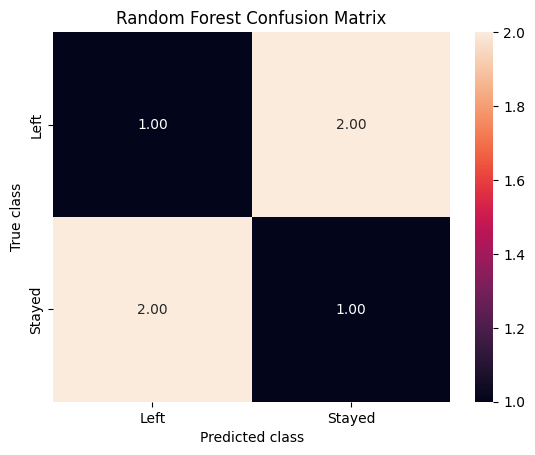

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)

forest_cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

sns.heatmap(forest_cm, annot=True, fmt='.2f', xticklabels=["Left", "Stayed"], yticklabels=["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [16]:
from sklearn.metrics import classification_report

y_pred = rfe.predict(X_test_scaled)

print("Predicted values:", y_pred)
print(classification_report(y_test, y_pred, zero_division=0))


Predicted values: [1 0 1 0 1 0]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6



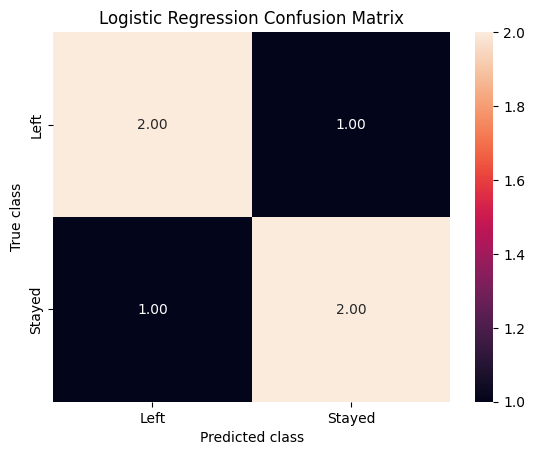

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

logreg = LogisticRegression(max_iter=1000) 
logreg.fit(X_train_scaled, y_train)

logreg_y_pred = logreg.predict(X_test_scaled) 

logreg_cm = confusion_matrix(y_test, logreg_y_pred, labels=[1, 0])

sns.heatmap(logreg_cm, annot=True, fmt='.2f', xticklabels=["Left", "Stayed"], yticklabels=["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


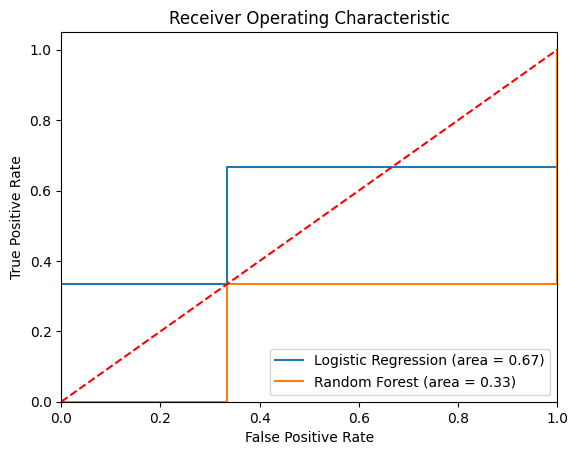

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have already created and scaled X_train_scaled and y_train
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()  # Initialize Random Forest classifier

# Fit the model using the scaled training data
logreg.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Calculate ROC AUC scores
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test_scaled))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:, 1])

# Plot ROC curves
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [19]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years-12.35%
time_spend_company-17.35%
Work_accident-19.68%
satisfaction_level-23.80%
last_evaluation-26.82%
